# **The Global Nature of Happiness**
***

### **Group Members:** ###

**- James Currie**

**- Christopher Johnson**

**- Salim Bhana**

# **Introduction**
***

Our dataset is about World Happiness. World happiness is based on the citizens' liking towards particular factors. It ranks each country in ascending order based on the happiness score it has received for the years of 2015 to 2019. The happiness score was based on factors such as life expectancy, social support, freedom, trust in the government, economy etc. An interesting analysis has been prepared in this report. 

The data was collected from a known database called kaggle. Kaggle has many public well established datasets which data scientists can use for their research.

The world happiness dataset can be used by many types of people. People who wish to go on a vacation or who want to live somewhere else can use this data. Airline agencies can use this data to decide on a reasonable pricing to a destination. Throughout this report, you will find insight to very important questions that need answering.

The data that was found was quite clean but we did edit some. Firstly we edited some of the names of the columns to help them match up better as the names had slight differences from year to year such as Family to Social Support. We dropped some columns that were not relevant such as standard error, dystopia residual.



# **Description Of The Data**
***

This dataset is based upon the World Happiness Report, is a survey of the state of global happiness. The report was first published in 2012, and was redone in 2013, 2015, 2016, 2017, 2018 and 2019. This report continues to gain worldwide recognition as a very important indication of a country's happiness. Governments, organizations, and civil society are beginning to use it to inform their policy-making decisions. (*Reference: https://www.kaggle.com/unsdsn/world-happiness?select=2015.csv*)

This dataset was found on *Kaggle*, and can be found at https://www.kaggle.com/unsdsn/world-happiness?select=2015.csv

Our group takes no credit for the collection, or organization of this data.

# **Analysis Of The Data**
***

This dataset is all about world happiness, and it describes the happiness for (almost) every country in the world over the course of 4 years (2015 to 2019). It does this by describing a few attributes which contribute to that score. Those attributes are as follows:

- GDP per capita: The GDP of the country divided by its total population.
- Life Expectancy: The average life expectancy of the general population.
- Social Support: A measure of the amount of support the average citizen is supported by friends, family, and society in general.
- Freedom: A measure of the amount of freedom the average citizen has.
- Trust: A measure of the amount of trust the average citizen has in their government.
- Generosity: A measure of the amount of generosity shown to/by the average citizen.

The initial data that can be found on the *Kaggle* site included some attributes which varied across the years in the dataset, as well as some which were not relevant to the work we wanted to complete. Thus, some work was done to clean up the data before it was imported into the project and utilized by the code we have writen. As for the quality of the data, it appears to be high enough quality to do some sound analysis of world happiness with it.

## **Discussion:**


### **After examining our dataset, we had picked very important questions that needed answers:** ###

#### - Why is Finland the happiest country in 2019?
#### - Which country is the worst in 2019? Why?
#### - Is there a correlation between Health and Long Life expectancy?
#### - What is the correlation between Trust and Freedom?
#### - What is the correlation between freedom and overall country happiness?
#### - How does the order of happiest countries change over time? What instigated the change in order?
#### - How much of an impact does the perception of corruption have on overall country happiness?

# **Exploratory Data Analysis**
***

## **Initializing the Datasets:**

In [126]:
# importing pandas
import pandas as pd
# importing numpy
import numpy as np
# importing matplotlib
import matplotlib.pyplot as plt
# importing seaborn
import seaborn as sns
# importing math
import math

In [82]:
# importing the data into dataframes

# Just Getting Every Single File and Returning a list containing DataFrames
def readFiles():
    x = []

    for i in range(2015, 2020):
        myStr = "world_happiness_data/" + str(i) + ".csv"
        x.append(pd.DataFrame(pd.read_csv(myStr)))
    
    return x

# the data is store within this array
yearly_data = readFiles()

## **Why is Finland the happiest country in 2019?**

#### **Question:** In 2019, which country has the *highest* happiness score? Between 2015 and 2019, what changed to make that country the highest rated?

**Answer:** In 2019, Finland has the highest overall happiness, with a score of 7.769. But **WHY?**

#### **Task:** Calculate the differences in each attribute per year (2015 to 2016, 2016 to 2017, etc.)

In [348]:
# printing out the data from the 2019 survey
yearly_data[4]

,Overall Score,Country,Happiness Score,GDP per capita,Life Expectancy,Social Support,Freedom,Trust,Generosity
0,1,Finland,7.769,1.340,0.986,1.587,0.596,0.393,0.153
1,2,Denmark,7.600,1.383,0.996,1.573,0.592,0.410,0.252
2,3,Norway,7.554,1.488,1.028,1.582,0.603,0.341,0.271
3,4,Iceland,7.494,1.380,1.026,1.624,0.591,0.118,0.354
4,5,Netherlands,7.488,1.396,0.999,1.522,0.557,0.298,0.322
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.614,0.711,0.555,0.411,0.217
152,153,Tanzania,3.231,0.476,0.499,0.885,0.417,0.147,0.276
153,154,Afghanistan,3.203,0.350,0.361,0.517,0.000,0.025,0.158
154,155,Central African Republic,3.083,0.026,0.105,0.000,0.225,0.035,0.235


In [83]:
# defining a function to complete the current task, as well as to be useful for future tasks.

# finds the changes in a specified country's attributes over the time period of the dataset (2015-2019)
def change_over_time(country):
    # the the final year over year changes
    return_values = {
        # the index value for the (eventual) dataframe
        "year_comparison": [], # will look something like this: ["2015 to 2016", "2016 to 2017", "2017 to 2018", "2018 to 2019"]
        # the column names for the (eventual) dataframe
        "happiness_diff": [],
        "gdp_per_capita_diff": [],
        "life_expectancy_diff": [],
        "social_support_diff": [],
        "freedom_diff": [],
        "trust_diff": [],
        "generosity_diff": []
    }

    
    for year in range(2015, 2019):
        x = 0
        while x < (len(yearly_data[year-2015].index)):
            if yearly_data[year-2015]["Country"][x] == str(country):
                return_values["year_comparison"].append(str(year) + " to " + str(year + 1)) # Year
                return_values["happiness_diff"].append(yearly_data[year-2015 + 1]['Happiness Score'][x] - yearly_data[year-2015]['Happiness Score'][x]) # Happiness Score
                return_values["gdp_per_capita_diff"].append(yearly_data[year-2015 + 1]['GDP per capita'][x] - yearly_data[year-2015]['GDP per capita'][x]) # GDP Per Capita
                return_values["life_expectancy_diff"].append(yearly_data[year-2015 + 1]['Life Expectancy'][x] - yearly_data[year-2015]['Life Expectancy'][x]) # Life Expectancy
                return_values["social_support_diff"].append(yearly_data[year-2015 + 1]['Social Support'][x] - yearly_data[year-2015]['Social Support'][x]) # Social Support
                return_values["freedom_diff"].append(yearly_data[year-2015 + 1]['Freedom'][x] - yearly_data[year-2015]['Freedom'][x]) # Freedom
                return_values["trust_diff"].append(yearly_data[year-2015 + 1]['Trust'][x] - yearly_data[year-2015]['Trust'][x]) # Trust
                return_values["generosity_diff"].append(yearly_data[year-2015 + 1]['Generosity'][x] - yearly_data[year-2015]['Generosity'][x]) # Generosity
            # increment the counter
            x += 1

    return return_values

In [84]:
# calling the change over time function for Finland
finland_results_dict = change_over_time("Finland")

# converting the values into a dataframe
finland_results = pd.DataFrame.from_dict(finland_results_dict)
finland_results

,year_comparison,happiness_diff,gdp_per_capita_diff,life_expectancy_diff,social_support_diff,freedom_diff,trust_diff,generosity_diff
0,2015 to 2016,-0.002,0.149900,-0.061510,-0.222160,-0.067990,-0.100430,0.214830
1,2016 to 2017,0.056,0.037592,-0.001752,0.405607,0.046911,-0.027428,-0.009437
2,2017 to 2018,0.018,-0.023572,0.117842,0.008753,0.042049,-0.025612,0.010517
3,2018 to 2019,0.137,0.035000,0.112000,-0.005000,-0.085000,0.000000,-0.049000


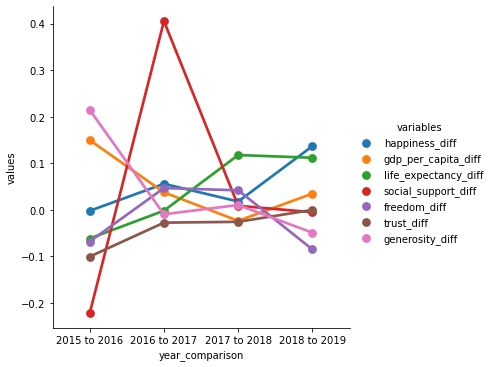

In [85]:
finland_results_melt = finland_results.melt("year_comparison", var_name="variables", value_name="values")
finland_plot = sns.catplot(x="year_comparison", y="values", hue="variables", data=finland_results_melt, kind="point")

### **Results:**
Finland was not always the highest rated country, and we can see its progression throughout the years covered by the dataset. In 2015, it started off in 6th place, but a general increase of GDP per capita, Life Expectancy, and Social Support seem to be the main factors for its rise to first place in 2019.

According  to Forbes (https://www.forbes.com/sites/heikkivaananen/2020/05/26/what-makes-finland-the-happiest-country-in-the-world/), there are many reasons as to why Finland is considered the happiest country on the planet. The first of which is its reputation for having very low levels of corruption in its governments. This gives the general population a sense of trust in their government, and helps them believe that their government is working for them. The second factor is its great social support and wide range of benefits provided to its citizens. This is reflected in the graph above, where social support is one of the main factors in the country’s high happiness score.


## **Which country is the worst in 2019? Why?**

#### **Question:** In 2019, which country has the *lowest* happiness score? Between 2015 and 2019, what changed to make that country the lowest rated?

**Answer:** In 2019, South Sudan had the lowest overall happiness, with a score of 2.853. But **WHY?**

#### **Task:** Calculate the differences in each attribute per year (2015 to 2016, 2016 to 2017, etc.)

In [86]:
# calling the change over time function for Finland
south_sudan_results_dict = change_over_time("South Sudan")
south_sudan_results_dict

# converting the values into a dataframe
south_sudan_results = pd.DataFrame.from_dict(south_sudan_results_dict)
south_sudan_results

,year_comparison,happiness_diff,gdp_per_capita_diff,life_expectancy_diff,social_support_diff,freedom_diff,trust_diff,generosity_diff
0,2016 to 2017,-0.175,0.037145,0.052120,0.250110,0.229343,-0.069221,-0.051042
1,2017 to 2018,-0.004,-0.211249,0.142514,-0.060323,0.383938,-0.036794,-0.075671
2,2018 to 2019,-0.051,0.013000,0.184000,-0.091000,-0.112000,-0.081000,-0.066000


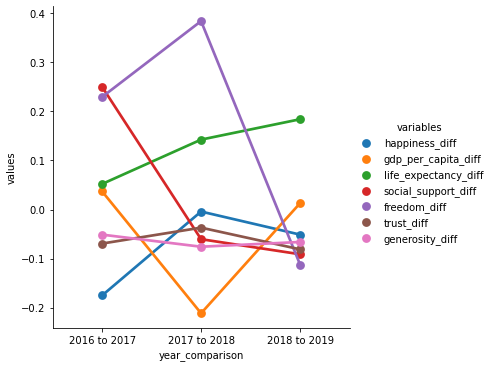

In [87]:
south_sudan_results_melt = south_sudan_results.melt("year_comparison", var_name="variables", value_name="values")
south_sudan_plot = sns.catplot(x="year_comparison", y="values", hue="variables", data=south_sudan_results_melt, kind="point")

### **Results:**
The worst country was South Sudan. South Sudan had the lowest overall happiness with a score of 2.853. Each year from 2016 to 2019, the happiness kept decreasing by some factor. In South Sudan, there is a poor economy with the GDP per capita being 0.013 in 2019. Freedom is also very low and the trust in the government is very low. This shows that the country is quite restrictive and does not give many opportunities.

According to Smart Travellers (https://www.smartraveller.gov.au/destinations/africa/south-sudan), South Sudan is a very bad country. There is kidnapping, rape, murder, assault. There is also very bad weather and crime can occur at any time of the day. Our findings conclude what was on the above website.


## **Is There a Correlation Between Social Support and Long Life expectancy?**

#### **Question:** Is there a correlation between Social Support and Life Expectancy? What is the correlation for each year in the dataset?

#### **Task:** Find the values of Social Support and Life Expectancy over each year in the dataset, and then graph the data to visualize any trends.

In [88]:
# defining a method which can fetch the data of two specified attributes for each year in the dataset
def correlation_data(attribute_one, attribute_two):
    # dictionary to store the return values
    return_values = {
        "year": [],
        str(attribute_one): [],
        str(attribute_two): []
    }

    for year in range(2015, 2020):
        
        x = 0
        while x < (len(yearly_data[year-2015].index)):
            # append the current year (appending every time to account for transfer to a dataframe later)
            return_values["year"].append(year)
            return_values[str(attribute_one)].append(yearly_data[year-2015][str(attribute_one)][x]) # append the first attribute
            return_values[str(attribute_two)].append(yearly_data[year-2015][str(attribute_two)][x]) # append the second attribute
           
            # increment the index value
            x += 1

    return return_values


In [94]:
# get the values of trust and freedom using the method we just defined
soc_sup_life_expect_correlation_dict = correlation_data("Social Support", "Life Expectancy")

# converting the dictionary returned by the function into a dataframe
soc_sup_life_expect_correlation = pd.DataFrame.from_dict(soc_sup_life_expect_correlation_dict)
soc_sup_life_expect_correlation

,year,Social Support,Life Expectancy
0,2015,1.34951,0.94143
1,2015,1.40223,0.94784
2,2015,1.36058,0.87464
3,2015,1.33095,0.88521
4,2015,1.32261,0.90563
...,...,...,...
777,2019,0.71100,0.61400
778,2019,0.88500,0.49900
779,2019,0.51700,0.36100
780,2019,0.00000,0.10500


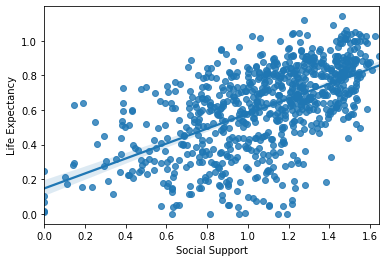

In [208]:
soc_sup_life_expect_correlation_plot = sns.regplot(x=soc_sup_life_expect_correlation['Social Support'], y=soc_sup_life_expect_correlation['Life Expectancy'])

In [212]:
# using the python function 'corr' to find the correlation, in addition to the graph
soc_sup_life_expect_correlation['Social Support'].corr(soc_sup_life_expect_correlation['Life Expectancy'])

0.5726502620763053

### **Results:**
There seems to be a moderate correlation between social support and life expectancy. The correlation coefficient is 0.57. This shows that the more family and friends a citizen has, the person is more likely to live longer. This is most likely due to them having support, ease and comfort from those who are close to them.


## **Is There a Correlation Between Trust and Freedom?**

#### **Question:** Is there a correlation between **Trust** and **Freedom**? What is the correlation for each year in the dataset?

#### **Task:** Find the values of **Trust** and **Freedom** over each year in the dataset, and then graph the data to visualize any trends.

In [90]:
# get the values of trust and freedom using a function we defined in an earlier question
trust_freedom_correlation_dict = correlation_data("Trust", "Freedom")

# converting the values from a dictionary to a dataframe
trust_freedom_correlation = pd.DataFrame.from_dict(trust_freedom_correlation_dict)
trust_freedom_correlation

,year,Trust,Freedom
0,2015,0.41978,0.66557
1,2015,0.14145,0.62877
2,2015,0.48357,0.64938
3,2015,0.36503,0.66973
4,2015,0.32957,0.63297
...,...,...,...
777,2019,0.41100,0.55500
778,2019,0.14700,0.41700
779,2019,0.02500,0.00000
780,2019,0.03500,0.22500


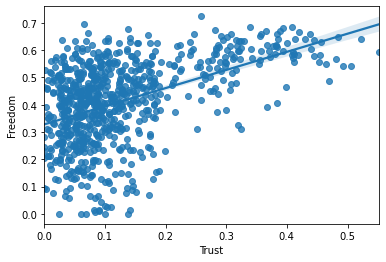

In [91]:
trust_freedom_correlation_plot = sns.regplot(x=trust_freedom_correlation['Trust'], y=trust_freedom_correlation['Freedom'])

In [213]:
# using the python function 'corr' to find the correlation, in addition to the graph
trust_freedom_correlation['Trust'].corr(trust_freedom_correlation['Freedom'])

0.459593278221153

### **Results:**
There is a moderate correlation between Trust and Freedom with the correlation coefficient being 0.46. This shows that Trust and Freedom has some impact on the overall happiness of its citizens. 

## **Is There a Correlation Between Freedom and Overall Country Happiness?**

#### **Question:** Is there a correlation between **Freedom** and **Overall Country Happiness**? What is the correlation for each year in the dataset?

#### **Task:** Find the values of **Freedom** and **Overall Score** over each year in the dataset, and then graph the data to visualize any trends.

In [97]:
# get the values of freedom and overall score using a function we defined in an earlier question
freedom_hap_score_correlation_dict = correlation_data("Freedom", "Overall Score")

# converting the values from a dictionary to a dataframe
freedom_hap_score_correlation = pd.DataFrame.from_dict(freedom_hap_score_correlation_dict)
freedom_hap_score_correlation

,year,Freedom,Overall Score
0,2015,0.66557,1
1,2015,0.62877,2
2,2015,0.64938,3
3,2015,0.66973,4
4,2015,0.63297,5
...,...,...,...
777,2019,0.55500,152
778,2019,0.41700,153
779,2019,0.00000,154
780,2019,0.22500,155


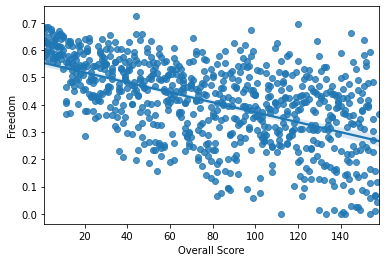

In [101]:
freedom_hap_score_correlation_plot = sns.regplot(x=freedom_hap_score_correlation['Overall Score'], y=freedom_hap_score_correlation['Freedom'])

In [214]:
# using the python function 'corr' to find the correlation, in addition to the graph
freedom_hap_score_correlation['Overall Score'].corr(freedom_hap_score_correlation['Freedom'])

-0.5379422314130164

### **Results:**
There is a moderate correlation between Freedom and overall country happiness. The happiest countries are seen to be where the most freedom occurs. There are, however, some outliers which can be seen in the graph above. The correlation coefficient is 0.54.


## **How Does the Order of Happiest Countries Change Over Time? What Instigated the Change in Order?**

#### **Question:** How did a country's position change from 2015 to 2019? What attribute had the biggest impact on this change?

#### **Task:** Compare the **Overall Score** of every country between 2015, and 2019, and store those values, along with the country's name in a dataframe. Then find the increase in every attribute for each country, and find which value had the greatest increase.

In [325]:
# a method to find the overall change in position over the range of the dataset
def total_change():
    return_values = {
        "Country": [],
        "Total Score Change": [],
        "Total GDP Change": [],
        "Total Life Expectancy Change": [],
        "Total Social Support Change": [],
        "Total Freedom Change": [],
        "Total Trust Change": [],
        "Total Generosity Change": []
    }

    for country_index, country in enumerate(yearly_data[4]["Country"]):
            # only add the value if the current index is within the length of the yearly_data list, and the specified country exists in the 2019 survey
            if (country_index < len(yearly_data[4]) and pd.isna(yearly_data[4]["Country"][country_index]) != True):
                for index, x in enumerate(yearly_data[0]["Country"]):
                    if (yearly_data[0]["Country"][index] == country):
                        return_values["Country"].append(country) # year
                        return_values["Total Score Change"].append(int(yearly_data[0]["Overall Score"][index]) - int(yearly_data[4]["Overall Score"][country_index])) # happiness score
                        return_values["Total GDP Change"].append(float(yearly_data[0]["GDP per capita"][index]) - float(yearly_data[4]["GDP per capita"][country_index])) # GDP per capita
                        return_values["Total Life Expectancy Change"].append(float(yearly_data[0]["Life Expectancy"][index]) - float(yearly_data[4]["Life Expectancy"][country_index])) # life expectancy
                        return_values["Total Social Support Change"].append(float(yearly_data[0]["Social Support"][index]) - float(yearly_data[4]["Social Support"][country_index])) # social support
                        return_values["Total Freedom Change"].append(float(yearly_data[0]["Freedom"][index]) - float(yearly_data[4]["Freedom"][country_index])) # freedom
                        return_values["Total Trust Change"].append(float(yearly_data[0]["Trust"][index]) - float(yearly_data[4]["Trust"][country_index])) # trust
                        return_values["Total Generosity Change"].append(float(yearly_data[0]["Generosity"][index]) - float(yearly_data[4]["Generosity"][country_index])) # generosity

    return return_values

In [326]:
# get the total change over the time period of the dataframe
total_score_diff_dict = total_change()

# converting the values from a dictionary to a dataframe for ease of use purposes
total_score_diff = pd.DataFrame.from_dict(total_score_diff_dict)

# find which attribute had the greatest increase for each country
greatest_increase = {
    "Greatest Name": [],
    "Greatest Increase": []
}

for country_index, country in enumerate(total_score_diff["Country"]):
    greatest_name = ""
    greatest = 0.0
    for column_index, column in enumerate(total_score_diff.columns):
        if column_index > 1:
            if total_score_diff[column][country_index] > greatest:
                greatest_name = column
                greatest = total_score_diff[column][country_index]
    greatest_increase["Greatest Name"].append(greatest_name)
    greatest_increase["Greatest Increase"].append(greatest)


total_score_diff["Greatest Name"] = greatest_increase["Greatest Name"]
total_score_diff["Greatest Increase"] = greatest_increase["Greatest Increase"]
total_score_diff

,Country,Total Score Change,Total GDP Change,Total Life Expectancy Change,Total Social Support Change,Total Freedom Change,Total Trust Change,Total Generosity Change,Greatest Name,Greatest Increase
0,Finland,5,-0.04975,-0.09689,-0.26874,0.04569,0.02072,0.08051,Total Generosity Change,0.08051
1,Denmark,1,-0.05752,-0.12136,-0.21242,0.05738,0.07357,0.08939,Total Generosity Change,0.08939
2,Norway,1,-0.02900,-0.14279,-0.25105,0.06673,0.02403,0.07599,Total Generosity Change,0.07599
3,Iceland,-2,-0.07768,-0.07816,-0.22177,0.03777,0.02345,0.08230,Total Generosity Change,0.08230
4,Netherlands,2,-0.06656,-0.10616,-0.24183,0.05876,0.02014,0.15410,Total Generosity Change,0.15410
...,...,...,...,...,...,...,...,...,...,...
144,Yemen,-15,0.25949,-0.06236,-0.48207,0.21271,0.00154,-0.01669,Total GDP Change,0.25949
145,Rwanda,2,-0.13692,-0.18536,0.06270,0.03701,0.14091,0.00928,Total Trust Change,0.14091
146,Tanzania,-7,-0.19080,-0.11685,0.11768,-0.08822,-0.08953,0.06777,Total Social Support Change,0.11768
147,Afghanistan,-1,-0.03018,-0.05765,-0.21415,0.23414,0.07219,0.20710,Total Freedom Change,0.23414


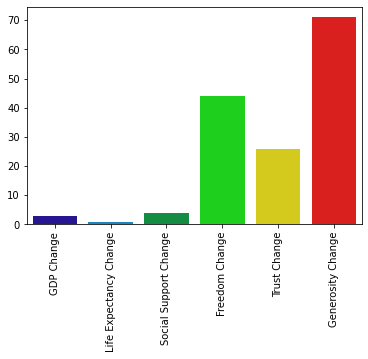

In [379]:
greatest_increase_count = {
    "Total GDP Change": 0,
    "Total Life Expectancy Change": 0,
    "Total Social Support Change": 0,
    "Total Freedom Change": 0,
    "Total Trust Change": 0,
    "Total Generosity Change": 0
}

# counting the number of times each attribute was the greatest increase
for n in total_score_diff["Greatest Name"]:
    if (n == "Total GDP Change"): greatest_increase_count["Total GDP Change"]+=1
    elif (n == "Total Life Expectancy Change"): greatest_increase_count["Total Life Expectancy Change"]+=1
    elif (n == "Total Social Support Change"): greatest_increase_count["Total Social Support Change"]+=1
    elif (n == "Total Freedom Change"): greatest_increase_count["Total Freedom Change"]+=1
    elif (n == "Total Trust Change"): greatest_increase_count["Total Trust Change"]+=1
    else: greatest_increase_count["Total Generosity Change"]+=1

x_vals = ["GDP Change", "Life Expectancy Change", "Social Support Change", "Freedom Change", "Trust Change", "Generosity Change"]
y_vals = [greatest_increase_count["Total GDP Change"], greatest_increase_count["Total Life Expectancy Change"], greatest_increase_count["Total Social Support Change"],
          greatest_increase_count["Total Freedom Change"], greatest_increase_count["Total Trust Change"], greatest_increase_count["Total Generosity Change"]]

# creating a bar plot (and adjusting the labels on the )
bar_plot = sns.barplot(x=x_vals, y=y_vals, palette='nipy_spectral');
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90)
plt.show()

*Note that the above values are not weighted, and thus do not give an accurate representation of the data.*

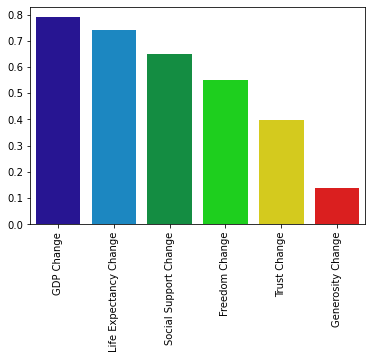

In [375]:
# next, we'll weight the data to make it more accurate.
# first, we need to find the relation between each value and the happiness score to do that
def happiness_correlation(attribute1):
    # finding the correlation between the entered value and the happiness score
    temp_happiness_correlation_dict = correlation_data(attribute1,'Happiness Score')

    # converting the dictionary to a dataframe for ease of use
    temp_happiness_correlation = pd.DataFrame.from_dict(temp_happiness_correlation_dict)

    # finding and returning the correlation between the two values
    return temp_happiness_correlation['Happiness Score'].corr(temp_happiness_correlation[attribute1])

# graphing the correlation data
x_vals = ["GDP Change", "Life Expectancy Change", "Social Support Change", "Freedom Change", "Trust Change", "Generosity Change"]
happiness_correlation_data = [happiness_correlation('GDP per capita'), happiness_correlation('Life Expectancy'), happiness_correlation('Social Support'),
           happiness_correlation('Freedom'),happiness_correlation('Trust'), happiness_correlation('Generosity')]

# creating a bar plot to visualize the correlation data
bar_plot = sns.barplot(x=x_vals, y=happiness_correlation_data, palette='nipy_spectral');
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90)
plt.show()

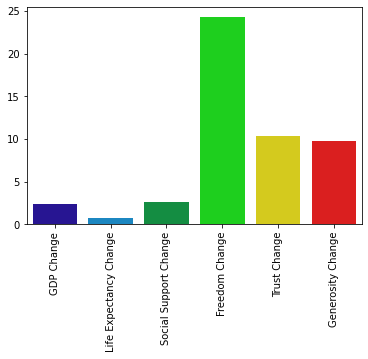

In [377]:
# weighting the values
greatest_increase_count["Total GDP Change"]*=happiness_correlation_data[0] # weighing GDP
greatest_increase_count["Total Life Expectancy Change"]*=happiness_correlation_data[1] # weighing life expectancy
greatest_increase_count["Total Social Support Change"]*=happiness_correlation_data[2] # weighing social support
greatest_increase_count["Total Freedom Change"]*=happiness_correlation_data[3] # weighing freedom
greatest_increase_count["Total Trust Change"]*=happiness_correlation_data[4] # weighing trust
greatest_increase_count["Total Generosity Change"]*=happiness_correlation_data[5] # weighing generosity


# graphing the final weighted values
y_vals = [greatest_increase_count["Total GDP Change"], greatest_increase_count["Total Life Expectancy Change"], greatest_increase_count["Total Social Support Change"],
          greatest_increase_count["Total Freedom Change"], greatest_increase_count["Total Trust Change"], greatest_increase_count["Total Generosity Change"]]

# creating a bar plot to visualize the final data
bar_plot = sns.barplot(x=x_vals, y=y_vals, palette='nipy_spectral');
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90)
plt.show()

### **Results:**
**Answer:** After weighting the values with respect to their correlation to the happiness score, it appears as though an increase in freedom is by far the most common cause of a positional increase. This is followed closely by an increase in trust and then generosity. This makes sense, given that an increase in GDP, Life Expectancy, and Social Support is unlikely to be felt day-to-day, and thus won't be reported on a survey.


## **How Much of an Impact Does the Perception of Corruption Have on Overall Country Happiness?**

#### **Question:** Is there a correlation between **The Perception of Corruption** and **Overall Country Happiness**? What is the correlation for each year in the dataset?

#### **Task:** Find the values of **Trust** and **Overall Score** over each year in the dataset, and then graph the data to visualize any trends.

In [104]:
# get the values of trust and overall score using a function we defined in an earlier question
trust_hap_score_correlation_dict = correlation_data("Trust", "Overall Score")

# converting the values from a dictionary to a dataframe
trust_hap_score_correlation = pd.DataFrame.from_dict(trust_hap_score_correlation_dict)
trust_hap_score_correlation

,year,Trust,Overall Score
0,2015,0.41978,1
1,2015,0.14145,2
2,2015,0.48357,3
3,2015,0.36503,4
4,2015,0.32957,5
...,...,...,...
777,2019,0.41100,152
778,2019,0.14700,153
779,2019,0.02500,154
780,2019,0.03500,155


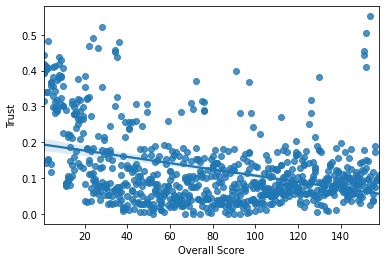

In [103]:
trust_hap_score_correlation_plot = sns.regplot(x=trust_hap_score_correlation['Overall Score'], y=trust_hap_score_correlation['Trust'])

In [215]:
# using the python function 'corr' to find the correlation, in addition to the graph
trust_hap_score_correlation['Overall Score'].corr(trust_hap_score_correlation['Trust'])

-0.3727805780080908

### **Results:**
**Answer:** There is a relatively weak negative correlation between trust and overall score, and so as the trust value falls, the overall score falls along with it. The correlation between these values is not all to high however, indicating that it is not very important for the overall happiness score of a country. This is also supported by the findings of the 'corr' function, which indicates a light correlation between these two values.

# **Potential Data Science**
***

From our findings and work with the dataset we were able to find relationships between the data and this could be useful for businesses or governments. One way that this would be useful is if some countries want to increase the overall happiness of the country and were not sure what they should improve first. With our work these countries would know that GDP per capita has the most influence on happiness and they would work On increasing their GDP which will increase their happiness. Another finding that would be useful for a country or business is that life expectancy has a large impact on happiness this means that countries should focus on healthcare and try to increase their life expectancy. 


# **Conclusion**
***

The limitations of this data is that there is no context. For example, a country could be at war so the freedom score could be low, but the data will not explain the main cause for a certain score has a weird mark. Data would have to be analyzed individually and conclusions have to be drawn by yourself. One lesson that we learned was how to gather questions related to our data. Finding appropriate questions to ask that relate to our data was one of the most difficult parts of our assignment. The way we learned to do this was to take our data and see if we could find any trends without diving deep into the data. Some of these things were what countries we saw consistently at the top another would be knowing what the problem is that we are trying to solve or understand. Some things that we did not predict was how trust and freedom was not that closely related. It seems that the trust in the government and freedom seem to be not that related. Generosity seemed to be the biggest.
